In [1]:
# Import Libraries & Dependencies for Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Input relevant notebook settings
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

In [2]:
# auto reload modules
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.9.1


#### Preprocessing the Dataset

In [4]:
from src.load_data import get_data

# Load train and test data into pandas dataframes
train_data, test_data = get_data(train_path='data/train.csv', test_path='data/test.csv')

print(f'Shape of Train Data: {train_data.shape}')
print(f'Shape of Test Data: {test_data.shape}')

Shape of Train Data: (1460, 81)
Shape of Test Data: (1459, 80)


In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1459.0,NaN,NaN,NaN,2190.0,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
MSSubClass,1459.0,NaN,NaN,NaN,57.378341,42.74688,20.0,20.0,50.0,70.0,190.0
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232.0,NaN,NaN,NaN,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,NaN,NaN,NaN,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
Street,1459,2,Pave,1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,107,2,Grvl,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1459,4,Reg,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1459,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1457,1,AllPub,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check for Missing Values
missing = train_data.isnull().sum().sort_values(ascending=False)
missing = missing.drop(missing[missing==0].index)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
# Fill missing values
from src.utils import filling_missing_values

train = filling_missing_values(train_data)
test = filling_missing_values(test_data)

In [11]:
# Drop unwanted columns

train_data.drop('LotFrontage',axis=1, inplace=True)
train_data.drop('Electrical',axis=1, inplace=True)

test_data.drop('LotFrontage',axis=1, inplace=True)
test_data.drop('Electrical',axis=1, inplace=True)

In [12]:
cat_train = train_data.select_dtypes(include='object')
cat_test = test_data.select_dtypes(include='object')

In [13]:
from category_encoders import CountEncoder
enc = CountEncoder(normalize = True, cols = cat_train.columns)
train = enc.fit_transform(train)

In [14]:
enc2= CountEncoder(normalize=True, cols=cat_test.columns)
test = enc2.fit_transform(test)

In [15]:
training = train.drop(['Id', 'SalePrice'], axis=1)
target_train = train['SalePrice']

In [16]:
test_data = test_data.drop('Id', axis=1)

In [17]:
# Train Test Split Model
X_train, X_test, y_train, y_test = train_test_split(training, target_train, test_size=0.33, random_state=42)

In [18]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Defining Neural Network

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape = [X_train.shape[1]], activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

In [20]:
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # Adam Optimizer
              metrics=["mae"])

In [21]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9984      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 174,849
Trainable params: 174,849
Non-trainable params: 0
_________________________________________________________________


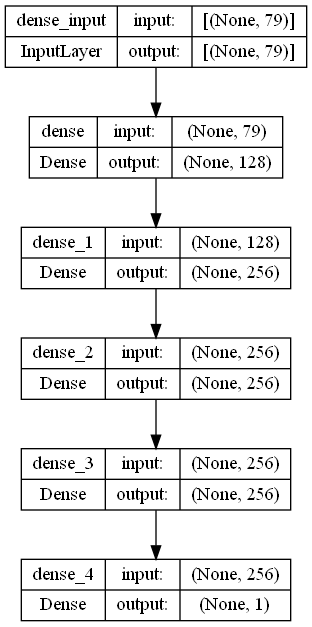

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [22]:
# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 180903.5781 - mae: 180903.5781 - val_loss: 179796.8906 - val_mae: 179796.8906
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 171889.5938 - mae: 171889.5938 - val_loss: 147141.0781 - val_mae: 147141.0781
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 87833.8828 - mae: 87833.8828 - val_loss: 42692.9570 - val_mae: 42692.9570
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 32246.5293 - mae: 32246.5293 - val_loss: 25361.2773 - val_mae: 25361.2773
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 22693.0996 - mae: 22693.0996 - val_loss: 22966.6348 - val_mae: 22966.6348
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 20013.4727 - mae: 20013.4727 - val_loss: 20787.7656 - val_mae: 20787.7656
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 17555.7793 - mae: 17555.7793 - val_lo

#### Visualizing the Predictions

In [23]:
# Make predictions
y_preds = model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [24]:
# View the predictions
y_preds

array([[157100.48 ],
       [364451.88 ],
       [114026.78 ],
       [163159.44 ],
       [356529.47 ],
       [105507.65 ],
       [218787.52 ],
       [140445.1  ],
       [100649.56 ],
       [156909.92 ],
       [159639.9  ],
       [126188.375],
       [102536.266],
       [211116.92 ],
       [172893.28 ],
       [133042.7  ],
       [188606.97 ],
       [119607.39 ],
       [106608.945],
       [221035.62 ],
       [179963.08 ],
       [215393.5  ],
       [163649.19 ],
       [143418.33 ],
       [204688.11 ],
       [141042.78 ],
       [178784.89 ],
       [106534.664],
       [161701.67 ],
       [193311.31 ],
       [142197.55 ],
       [258499.52 ],
       [218371.11 ],
       [111145.78 ],
       [254133.7  ],
       [134775.38 ],
       [126574.414],
       [194921.64 ],
       [318801.88 ],
       [ 93244.734],
       [125016.01 ],
       [246604.52 ],
       [126020.51 ],
       [381413.06 ],
       [131776.73 ],
       [141348.69 ],
       [119244.516],
       [13917

In [26]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 19247.1934 - mae: 19247.1934


[19247.193359375, 19247.193359375]

In [28]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=19247.195>

In [29]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=19247.194161696058>

#### Saving the Model

In [30]:
# Save a model using the SavedModel format
model.save('best_model')

INFO:tensorflow:Assets written to: best_model\assets


In [31]:
# Save a model using the HDF5 format
model.save("best_model.h5") # note the addition of '.h5' on the end

#### Loading the Model

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model")
loaded_saved_model.summary()

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model.h5")
loaded_h5_model.summary()